### Palmleaf1.pgm Image

In [1]:
#Libraries like Numpy, PIL, CV2, matplotlib, seaborn were used in this code.
import numpy as np
from PIL import Image
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.cm as cm

In [2]:
#This code is used to read image file.
palm_leaf1=cv2.imread('palmleaf1.pgm') 
palm_leaf1 = cv2.cvtColor(palm_leaf1, cv2.COLOR_BGR2GRAY)

In [3]:
#This code converts image to matrix form.
img=palm_leaf1
n=palm_leaf1.shape[0]
m=palm_leaf1.shape[1]
palm_leaf1.shape

(132, 208)

In [4]:
#This code is used to show the image.
image = Image.fromarray(img)
image.show()

In [5]:
#coverts n*m array in (n*m,1) list.
ar_img=[]
for i in range(n):
    ar_img += list(img[i,:])

In [6]:
#This code is used to find image histogram.
F_i=[]
maximum_gray_scale_value=255
for i in range(maximum_gray_scale_value+1):
    t=ar_img.count(i)
    F_i.append(t)

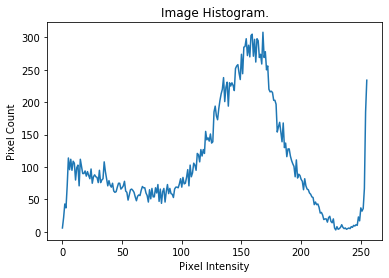

In [7]:
#plot of F_i image histogram.
X_axis=[i for i in range(256)]
plt.plot(X_axis,F_i)
plt.xlabel('Pixel Intensity')
plt.ylabel('Pixel Count')
plt.title('Image Histogram.')
plt.show()

In [8]:
#This is the code to find U_T(Total_mean value).
U_T=0
N=n*m
for i in range(maximum_gray_scale_value+1):
    U_T += (i*F_i[i])
    
U_T=U_T/N

In [9]:
#U_T(Total_mean value).
U_T

129.93178175990676

In [10]:
#This code helps in finding the optimal value of t.
maximum_gray_scale_value=255
sigma_b_t=[]
for t in range(1,maximum_gray_scale_value+1):
    N1=sum(F_i[0:t])
    N2=sum(F_i[t:maximum_gray_scale_value+1])
    U1_T=sum([(i*F_i[i])/N1 for i in range(t)])
    U2_T=sum([(i*F_i[i])/N2 for i in range(t,maximum_gray_scale_value+1)])
    tmp=((U1_T-U_T)**2)*(N1/N) + ((U2_T-U_T)**2)*(N2/N)
    sigma_b_t.append(round(tmp))    
    
optimal_t=sigma_b_t.index(max(sigma_b_t))
optimal_t

103

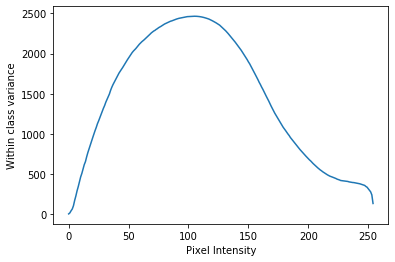

In [11]:
#plot of sigma_b_t
X_axis=[i for i in range(255)]
plt.plot(X_axis,sigma_b_t)
plt.xlabel('Pixel Intensity')
plt.ylabel('Within class variance')
plt.show()

In [12]:
#This code helps in finding the Binary image.
new_img=np.zeros((n,m))
for i in range(n):
    for j in range(m):
        if img[i,j] < optimal_t :
            new_img[i,j]=0
        else:
            new_img[i,j]=1   

In [13]:
#This is the matrix of new binary image.
new_img 

array([[1., 1., 1., ..., 0., 1., 1.],
       [1., 1., 1., ..., 0., 1., 1.],
       [1., 1., 1., ..., 0., 1., 0.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [14]:
#This code is used to save the binary image. 
plt.imsave('binary_palm_leaf1.png', new_img  , cmap=cm.gray) 

In [15]:
#This code is used to show the binary image.
pa=cv2.imread('binary_palm_leaf1.png') 
Final_image = Image.fromarray(pa)
Final_image.show()

### Palmleaf2.pgm Image

In [16]:
#This code is used to read image file.
palm_leaf2=cv2.imread('palmleaf2.pgm') 
palm_leaf2 = cv2.cvtColor(palm_leaf2, cv2.COLOR_BGR2GRAY)

In [17]:
#This code converts image to matrix form.
img2=palm_leaf2
n2=palm_leaf2.shape[0]
m2=palm_leaf1.shape[1]
palm_leaf2.shape

(196, 400)

In [18]:
#This code is used to show the image.
image2 = Image.fromarray(img2)
image2.show()

In [19]:
#coverts n2*m2 array in (n2*m2,1) list.
ar_img2=[]
for i in range(n2):
    ar_img2 += list(img2[i,:])

In [20]:
#This code is used to find image histogram.
F_i2=[]
#maximum_gray_scale_value=255
for i in range(256):
    t=ar_img2.count(i)
    F_i2.append(t)

In [21]:
#This code is used to find image histogram.
N2=255
f=0
while f == 0 :
    f=F_i2[N2]
    N2 = N2 -1
    
print(N2)
maximum_gray_scale_value=N2

124


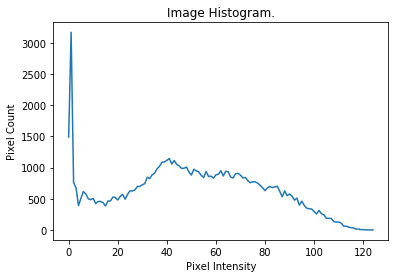

In [22]:
#plot of F_i2 Image histogram.
X_axis2=[i for i in range(maximum_gray_scale_value+1)]
plt.plot(X_axis2,F_i2[0:maximum_gray_scale_value+1])
plt.xlabel('Pixel Intensity')
plt.ylabel('Pixel Count')
plt.title('Image Histogram.')
plt.show()

In [23]:
# This code helps in finding U_T2(Total_mean value).
U_T2=0
N2=n2*m2
for i in range(maximum_gray_scale_value+1):
    U_T2 += (i*F_i2[i])
    
U_T2=U_T2/N2

In [24]:
#U_T2(Total_mean value).
U_T2

95.60827119309262

In [25]:
#This code helps in finding the optimal value of t.
sigma_b_t2=[]
for t in range(1,maximum_gray_scale_value+1):
    N1_2=sum(F_i2[0:t])
    N2_2=sum(F_i2[t:maximum_gray_scale_value+1])
    if N1_2==0 or N2_2==0:
        U1_T2=0
        U2_T2=0
    else:
        U1_T2=sum([(i*F_i2[i])/N1_2 for i in range(t)])
        U2_T2=sum([(i*F_i2[i])/N2_2 for i in range(t,maximum_gray_scale_value+1)])
    tmp=((U1_T2-U_T2)**2)*(N1_2/N2) + ((U2_T2-U_T2)**2)*(N2_2/N2)
    sigma_b_t2.append(round(tmp))    
    
optimal_t2=sigma_b_t2.index(max(sigma_b_t2))
optimal_t2

49

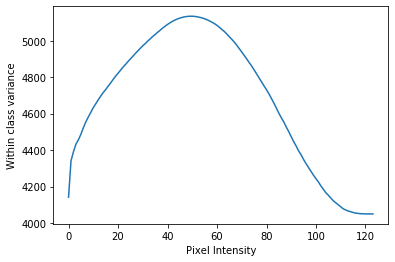

In [26]:
#plot of sigma_b_t2
X_axis2=[i for i in range(maximum_gray_scale_value)]
plt.plot(X_axis2,sigma_b_t2)
plt.xlabel('Pixel Intensity')
plt.ylabel('Within class variance')
plt.show()

In [27]:
#This code helps in finding the Binary image.
new_img2=np.zeros((n2,m2))
for i in range(n2):
    for j in range(m2):
        if img2[i,j] < optimal_t2 :
            new_img2[i,j]=0
        else:
            new_img2[i,j]=1   

In [28]:
#This is the matrix of new binary image.
new_img2

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [29]:
#This code is used to save the binary image. 
plt.imsave('binary_palm_leaf2.png', new_img2  , cmap=cm.gray) 

In [31]:
#This code is used to show the binary image. 
pa2=cv2.imread('binary_palm_leaf2.png') 
Final_image2 = Image.fromarray(pa2)
Final_image2.show()

### Observation

#### Otsu's Thresholding:

Otsu's Thresholding algorithm
1. Process the input image.
2. Obtain image histogram (distribution of pixels).
3. Compute the threshold value T
4. Replace image pixels into white in those regions, where saturation is
greater than T and into the black in the opposite cases.

#### Observation and result:

As mentioned above the input image was processed and for dierent value of t
the within class variance was found out and the optimal value of t was found
out for which within class variance was minimum. Replacing image pixels into
white in those regions, where saturation is greater than T and into the black in
the opposite cases was done.
Below is the Final image of palmleaf 1 and 2 after applying Otsu's method.
Since in palm leaf 2 initial image there was illumination gradient.Here we
applied global threshold but that doesn't work for the image that has illumina-
tion gradient.so the palm leaf image 2 has darker shades at the top and bottom.
This can be overcome by using local threshold method.
But since palm leaf 1 has the uniform illumination we can apply here global
threshold method.